In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from adjustText import adjust_text
import array as arr
import torch

# %pip install eqtransformer
# %pip install adjustText
# %pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [57]:
# Use GPU
torch.cuda.is_available()

True

In [58]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
cat_ds03 = pd.read_excel("ds03.xlsx")

In [4]:
cat_ds03

,CI YEAR,CLUSTER ID,STATION,NETWORK CODE,FILTER USED (Hz)
0,1,OC1,J25A,7D,HP 5
1,1,NaN,M08A,7D,HP 5
2,1,NaN,I02D,TA,HP 5
3,1,OC2,J25A,7D,BP 5-10
4,1,NaN,J33A,7D,BP 5-15
...,...,...,...,...,...
247,4,CI4-45,FC03D,7D,BP 1-15
248,4,NaN,HEBO,UW,BP 2-10
249,4,CI4-47,NLWA,US,HP 3
250,4,CI4-48,OCP,UW,BP 3-10


In [5]:
cat_7D = cat_ds03[cat_ds03["NETWORK CODE"] == "7D"]
cat_7D

,CI YEAR,CLUSTER ID,STATION,NETWORK CODE,FILTER USED (Hz)
0,1,OC1,J25A,7D,HP 5
1,1,NaN,M08A,7D,HP 5
3,1,OC2,J25A,7D,BP 5-10
4,1,NaN,J33A,7D,BP 5-15
8,1,NaN,J41A,7D,BP 5-25
...,...,...,...,...,...
239,4,CI4-38,G33D,7D,HP 1
241,4,CI4-39,G33D,7D,HP 2
243,4,CI4-40,J09D,7D,HP 5
246,4,NaN,J17D,7D,HP 3


In [6]:
cat_7D['STATION']

0       J25A
1       M08A
3       J25A
4       J33A
8       J41A
       ...  
239     G33D
241     G33D
243     J09D
246     J17D
247    FC03D
Name: STATION, Length: 94, dtype: object

In [7]:
stations= (cat_7D['STATION']).tolist()
stations

['J25A',
 'M08A',
 'J25A',
 'J33A',
 'J41A',
 'J49A',
 'J65A',
 'J57A',
 'J65A',
 'M09B',
 'J25B',
 'J25B',
 'J33B',
 'FS13B',
 'FS20B',
 'G10B',
 'FS16B  ',
 'G10B  ',
 'G10B  ',
 'FS09B  ',
 'FS13B  ',
 'FS13B  ',
 'FS13B  ',
 'FS16B  ',
 'G10B',
 'FS17B  ',
 'G19B  ',
 'M14B  ',
 'M14B  ',
 'G19B  ',
 'G19B  ',
 'M14B  ',
 'G17B',
 'G17B',
 'G19B  ',
 'G26B  ',
 'G27B  ',
 'G25B  ',
 'G26B  ',
 'M12B  ',
 'M12B  ',
 'G25B  ',
 'M12B  ',
 'M12B  ',
 'J09B',
 'J33B',
 'J25C',
 'M08C',
 'J33C ',
 'J25C ',
 'M05C ',
 'M06C ',
 'FN02C ',
 'FN02C ',
 'J26C',
 'J34C',
 'J26C',
 'J34C',
 'M06C ',
 'J34C',
 'M06C ',
 'M05C ',
 'M06C ',
 'J42C',
 'M06C ',
 'J41C',
 'M05C ',
 'J42C',
 'J65C',
 'M03C',
 'J67C',
 'M01C',
 'FS16D',
 'FS09D',
 'FS17D',
 'FS14D',
 'FS44D',
 'FS43D',
 'FS17D',
 'FS41D',
 'FS13D',
 'G09D',
 'FS45D',
 'G10D',
 'M17D',
 'M16D',
 'G18D',
 'M15D',
 'M15D',
 'G33D',
 'G33D',
 'J09D',
 'J17D',
 'FC03D']

In [118]:
index_FS13B = stations.index('FS13B')
index_FS13B_space = stations.index('FS13B  ')

In [78]:
print(index_FS13B)
print(index_FS13B_space)

13
20


In [39]:
s = stations[index]
t= s.replace(" ", "")
t
# for i in stations:
#     [i]= [i].replace(' ','')

'FS13B'

In [35]:
t = s
t.replace(' ','')
t

'FS13B  '

In [8]:
for i in range(len(stations)):
    s = stations[i]
    stations[i]= s.replace(" ", "")
        
stations

['J25A',
 'M08A',
 'J25A',
 'J33A',
 'J41A',
 'J49A',
 'J65A',
 'J57A',
 'J65A',
 'M09B',
 'J25B',
 'J25B',
 'J33B',
 'FS13B',
 'FS20B',
 'G10B',
 'FS16B',
 'G10B',
 'G10B',
 'FS09B',
 'FS13B',
 'FS13B',
 'FS13B',
 'FS16B',
 'G10B',
 'FS17B',
 'G19B',
 'M14B',
 'M14B',
 'G19B',
 'G19B',
 'M14B',
 'G17B',
 'G17B',
 'G19B',
 'G26B',
 'G27B',
 'G25B',
 'G26B',
 'M12B',
 'M12B',
 'G25B',
 'M12B',
 'M12B',
 'J09B',
 'J33B',
 'J25C',
 'M08C',
 'J33C',
 'J25C',
 'M05C',
 'M06C',
 'FN02C',
 'FN02C',
 'J26C',
 'J34C',
 'J26C',
 'J34C',
 'M06C',
 'J34C',
 'M06C',
 'M05C',
 'M06C',
 'J42C',
 'M06C',
 'J41C',
 'M05C',
 'J42C',
 'J65C',
 'M03C',
 'J67C',
 'M01C',
 'FS16D',
 'FS09D',
 'FS17D',
 'FS14D',
 'FS44D',
 'FS43D',
 'FS17D',
 'FS41D',
 'FS13D',
 'G09D',
 'FS45D',
 'G10D',
 'M17D',
 'M16D',
 'G18D',
 'M15D',
 'M15D',
 'G33D',
 'G33D',
 'J09D',
 'J17D',
 'FC03D']

In [9]:
from functools import reduce
 

delim = ","
 
stations = reduce(lambda x, y: str(x) + delim + str(y), stations)
 
stations

'J25A,M08A,J25A,J33A,J41A,J49A,J65A,J57A,J65A,M09B,J25B,J25B,J33B,FS13B,FS20B,G10B,FS16B,G10B,G10B,FS09B,FS13B,FS13B,FS13B,FS16B,G10B,FS17B,G19B,M14B,M14B,G19B,G19B,M14B,G17B,G17B,G19B,G26B,G27B,G25B,G26B,M12B,M12B,G25B,M12B,M12B,J09B,J33B,J25C,M08C,J33C,J25C,M05C,M06C,FN02C,FN02C,J26C,J34C,J26C,J34C,M06C,J34C,M06C,M05C,M06C,J42C,M06C,J41C,M05C,J42C,J65C,M03C,J67C,M01C,FS16D,FS09D,FS17D,FS14D,FS44D,FS43D,FS17D,FS41D,FS13D,G09D,FS45D,G10D,M17D,M16D,G18D,M15D,M15D,G33D,G33D,J09D,J17D,FC03D'

In [10]:
## Get station inventory from obspy
from obspy.clients.fdsn.client import Client
stations = stations
network = '7D'
channels = 'HH*'
client = Client("IRIS")
inventory = client.get_stations(network=network, station=stations)

In [58]:
type(inventory)

obspy.core.inventory.inventory.Inventory

In [186]:
inventory

Inventory created at 2023-10-21T03:51:40.942500Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?network=7D&station=J...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			7D
		Stations (57):
			7D.FC03D (LDEO OBS TRAWL-RESISTANT)
			7D.FN02C (LDEO OBS TRAWL-RESISTANT)
			7D.FS09B (WHOI OBS ID S85)
			7D.FS09D (WHOI OBS ID S83)
			7D.FS13B (LDEO OBS STANDARD DEEP)
			7D.FS13D (WHOI OBS ID S80)
			7D.FS14D (LDEO OBS TRAWL-RESISTANT)
			7D.FS16B (LDEO OBS STANDARD DEEP)
			7D.FS16D (WHOI OBS ID S82)
			7D.FS17B (LDEO OBS TRAWL-RESISTANT)
			7D.FS17D (LDEO OBS TRAWL-RESISTANT)
			7D.FS20B (LDEO OBS STANDARD DEEP)
			7D.FS41D (WHOI OBS ID S88)
			7D.FS43D (LDEO OBS TRAWL-RESISTANT)
			7D.FS44D (SIO OBS ID FS44D)
			7D.FS45D (LDEO OBS TRAWL-RESISTANT)
			7D.G09D (WHOI OBS ID S87)
			7D.G10B (SIO OBS ID G10B)
			7D.G10D (SIO OBS ID G10D)
			7D.G17B (LDEO OBS TRAWL-RESISTANT)
			7D.G18D (LDEO OBS STANDAR

In [121]:
station1 = inventory[0][index_FS13B]
station2 = inventory[0][index_FS13B_space]

In [122]:
print(station1.latitude)
print(station2.latitude)

40.711899
41.304699


In [123]:
type(station1.start_date)

obspy.core.utcdatetime.UTCDateTime

In [124]:
station1.start_date

2014-09-14T00:00:00.000000Z

In [125]:
station1 = inventory[0][0] 
print(station1)
print(station1.latitude) 
print(station1.start_date)
print(station1.end_date)


Station FC03D (LDEO OBS TRAWL-RESISTANT)
	Station Code: FC03D
	Channel Count: 0/9 (Selected/Total)
	2014-09-07T00:00:00.000000Z - 2015-10-02T23:59:59.000000Z
	Access: open 
	Latitude: 44.8133, Longitude: -124.7383, Elevation: -432.0 m
	Available Channels:

44.813301
2014-09-07T00:00:00.000000Z
2015-10-02T23:59:59.000000Z


In [126]:
station2 = inventory[0][1]
print(station2)
print(station2.latitude)
print(station2.start_date)
print(station2.end_date)


Station FN02C (LDEO OBS TRAWL-RESISTANT)
	Station Code: FN02C
	Channel Count: 0/9 (Selected/Total)
	2013-08-31T00:00:00.000000Z - 2014-06-28T23:59:59.000000Z
	Access: open 
	Latitude: 46.9497, Longitude: -124.4280, Elevation: -67.0 m
	Available Channels:

46.949699
2013-08-31T00:00:00.000000Z
2014-06-28T23:59:59.000000Z


In [127]:
start_date1 = mdates.date2num(station1.start_date)
end_date1 =  mdates.date2num(station1.end_date)
latitude1 = station1.latitude

start_date2 = mdates.date2num(station2.start_date)
end_date2 =  mdates.date2num(station2.end_date)
latitude2 = station2.latitude

print(type(start_date1))

<class 'numpy.float64'>


In [128]:
dates1.shape

(391,)

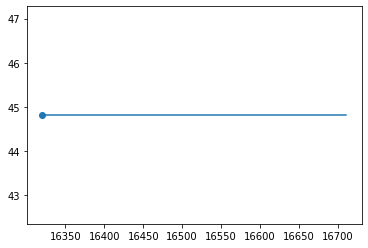

In [134]:
dates1 = np.arange(start_date1,end_date1)
dates2 = np.arange(start_date2,end_date2)
plt.figure()
# plt.plot_date(dates1, latitude1,'-')
plt.plot([start_date1, end_date1],[latitude1,latitude1])

In [13]:
start_dates

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [12]:
# start_dates = np.zeros(len(inventory[0])) # Make a list to contain all the start dates 
# end_dates = np.zeros(len(inventory[0])) # Make a list to contain all the end dates 
start_dates = [] # Make a list to contain all the start dates 
end_dates = [] # Make a list to contain all the end dates 
latitudes = np.zeros(len(inventory[0])) # Make a list to contain all the latitudes

for i in range(len(inventory[0])): 
    start_dates.append(inventory[0][i].start_date.datetime)
    end_dates.append(inventory[0][i].end_date.datetime)
    latitudes[i] = inventory[0][i].latitude
    
# start_dates =start_dates.tolist() # Make a list to contain all the start dates 
# end_dates = end_dates.tolist() # Make a list to contain all the end dates 

# Find the latitudes less than 42 degrees. 
a = latitudes
index_lat_less_than_42 = np.asarray(np.where(42 >= a))
print(type(index_lat_less_than_42))

latitudes = latitudes.tolist()

# Convert inventory to a np.array
inventory_codes = []
for i in range(len(inventory[0])):
    inventory_codes.append(inventory[0][i].code)

inventory_codes = np.asarray(inventory_codes)
# print(type(arr_inventory_codes))

# for i in range(len(inventory[0])): 
#     start_dates.append(inventory[0][i].start_date.datetime) 
#     end_dates.append(inventory[0][i].end_date.datetime) 
#     latitudes.append(inventory[0][i].latitude) 



<class 'numpy.ndarray'>


In [156]:
inventory_codes

['FC03D',
 'FN02C',
 'FS09B',
 'FS09D',
 'FS13B',
 'FS13D',
 'FS14D',
 'FS16B',
 'FS16D',
 'FS17B',
 'FS17D',
 'FS20B',
 'FS41D',
 'FS43D',
 'FS44D',
 'FS45D',
 'G09D',
 'G10B',
 'G10D',
 'G17B',
 'G18D',
 'G19B',
 'G25B',
 'G26B',
 'G27B',
 'G33D',
 'J09B',
 'J09D',
 'J17D',
 'J25A',
 'J25B',
 'J25C',
 'J26C',
 'J33A',
 'J33B',
 'J33C',
 'J34C',
 'J41A',
 'J41C',
 'J42C',
 'J49A',
 'J57A',
 'J65A',
 'J65C',
 'J67C',
 'M01C',
 'M03C',
 'M05C',
 'M06C',
 'M08A',
 'M08C',
 'M09B',
 'M12B',
 'M14B',
 'M15D',
 'M16D',
 'M17D']

In [67]:
print(len(start_dates))
print(len(end_dates))
print(len(latitudes))


57
57
57


In [68]:
start_dates

[datetime.datetime(2014, 9, 7, 0, 0),
 datetime.datetime(2013, 8, 31, 0, 0),
 datetime.datetime(2012, 8, 28, 0, 0),
 datetime.datetime(2014, 7, 16, 0, 0),
 datetime.datetime(2012, 9, 12, 0, 0),
 datetime.datetime(2014, 7, 16, 0, 0),
 datetime.datetime(2014, 9, 14, 0, 0),
 datetime.datetime(2012, 9, 12, 0, 0),
 datetime.datetime(2014, 7, 16, 0, 0),
 datetime.datetime(2012, 9, 15, 0, 0),
 datetime.datetime(2014, 9, 14, 0, 0),
 datetime.datetime(2012, 9, 12, 0, 0),
 datetime.datetime(2014, 7, 16, 0, 0),
 datetime.datetime(2014, 9, 14, 0, 0),
 datetime.datetime(2014, 8, 12, 0, 0),
 datetime.datetime(2014, 9, 13, 0, 0),
 datetime.datetime(2014, 7, 16, 0, 0),
 datetime.datetime(2012, 9, 3, 0, 0),
 datetime.datetime(2014, 8, 11, 0, 0),
 datetime.datetime(2012, 9, 17, 0, 0),
 datetime.datetime(2014, 9, 13, 0, 0),
 datetime.datetime(2012, 8, 28, 0, 0),
 datetime.datetime(2012, 9, 18, 0, 0),
 datetime.datetime(2012, 9, 17, 0, 0),
 datetime.datetime(2012, 9, 3, 0, 0),
 datetime.datetime(2014, 8, 

In [18]:
len(inventory[0])

57

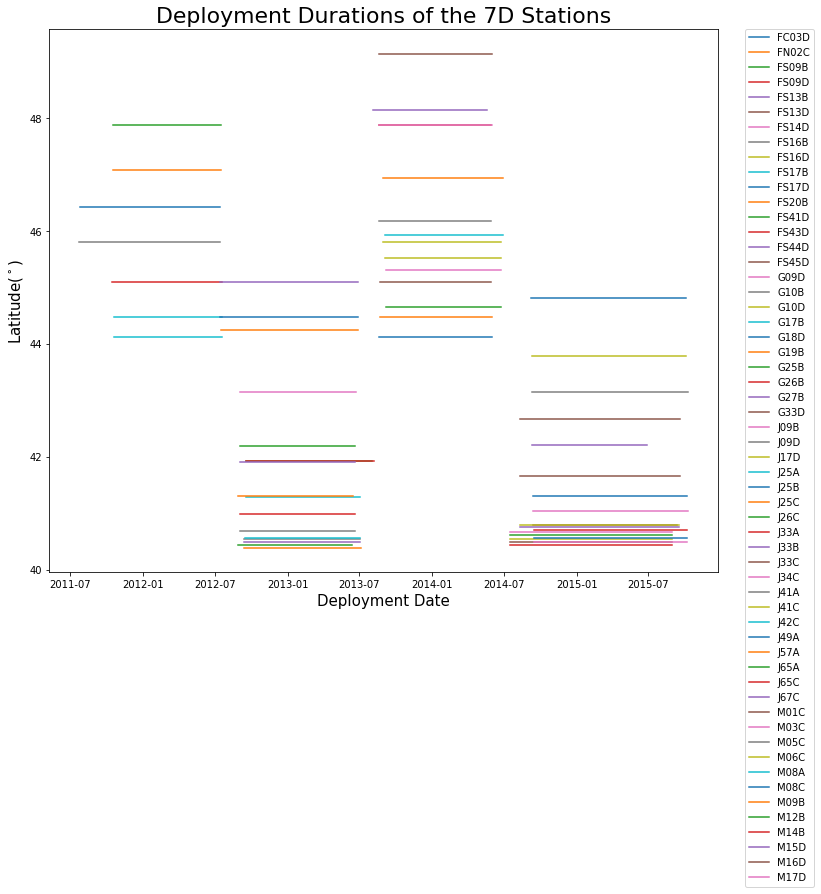

In [89]:
# Plot the start and end dates with respect to the latitudes

plt.figure(figsize=(12,10))
for i in range(len(inventory[0])):
    plt.plot([start_dates[i], end_dates[i]],[latitudes[i],latitudes[i]], label=str(inventory[0][i].code))
    
plt.xlabel("Deployment Date",fontsize=15)
plt.ylabel("Latitude($^\circ$)", fontsize=15)
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.title("Deployment Durations of the 7D Stations",fontsize=22)
plt.show()

In [38]:
from datetime import datetime
t1 = datetime(2012,7, 1)
t2 = datetime(2012,12, 31)
keep = [i for i,e in enumerate(start_dates) if (e > t1) and (e < t2)]
filtered_stations = [stations.split(",")[i] for i in keep]

In [39]:
filtered_stations

['J25A',
 'J41A',
 'J57A',
 'M09B',
 'J25B',
 'G10B',
 'FS09B',
 'FS13B',
 'FS13B',
 'FS16B',
 'G10B',
 'G19B',
 'G19B',
 'G19B',
 'M06C',
 'FN02C',
 'FN02C']

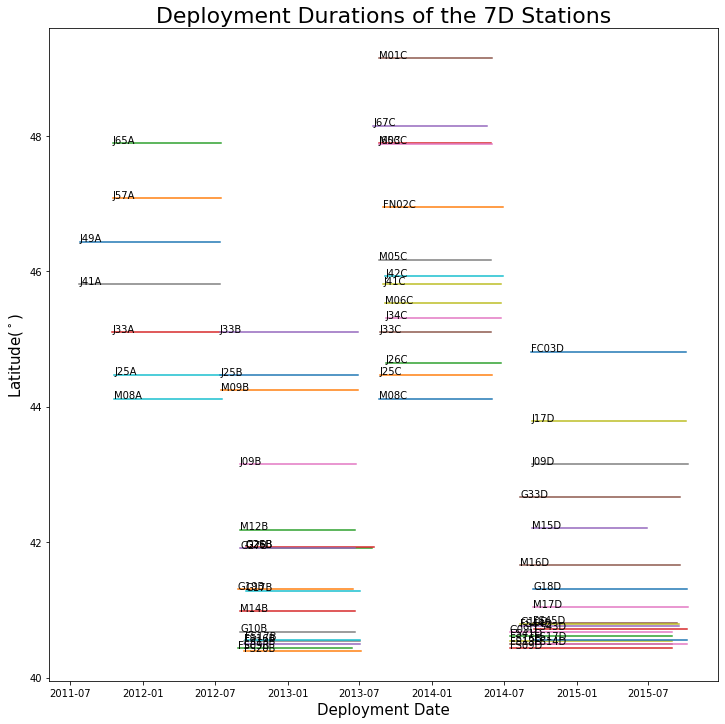

In [16]:
# Plot the start and end dates with respect to the latitudes
plt.figure(figsize=(12,12))
for i in range(len(inventory[0])):
    if latitudes[i]< 60: 
        
        plt.plot([start_dates[i], end_dates[i]],[latitudes[i],latitudes[i]], label=inventory_codes[i])
        plt.text(x=start_dates[i],y=latitudes[i], s = inventory_codes[i])
    

plt.xlabel("Deployment Date",fontsize=15)
plt.ylabel("Latitude($^\circ$)", fontsize=15)
plt.title("Deployment Durations of the 7D Stations",fontsize=22)

# # print(range(len(inventory[0])))
# plt.figure(figsize=(10,10))
# for i in index_lat_less_than_42:
#     plt.plot([start_dates[i], end_dates[i]],[latitudes[i],latitudes[i]], label=inventory_codes[i])
#     plt.text(x=start_dates[i],y=latitudes[i], s = inventory_codes[i])

# plt.xlabel("Deployment Date",fontsize=15)
# plt.ylabel("Latitude($^\circ$)", fontsize=15)
# # plt.title("Deployment Durations of the 7D Stations",fontsize=22)


# plt.ylim(41.7,42)
plt.show()

In [40]:
from pnwstore.mseed import WaveformClient

client = WaveformClient()

for sta in filtered_stations:
    for day in range(30):
        print(client.get_waveforms(network="7D", station=sta, channel="?H?",
                               year=2013, month=5, day=day+1))

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) in Stream:

0 Trace(s) 

In [43]:

s= client.get_waveforms(network="7D", station='M09B', channel="?H?",
                               year=2013, month=5, day=26)


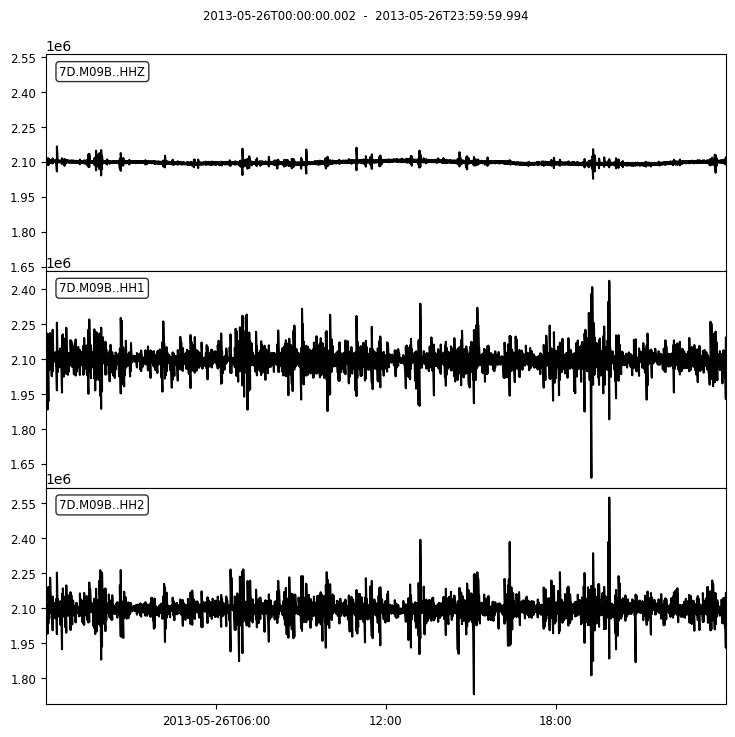

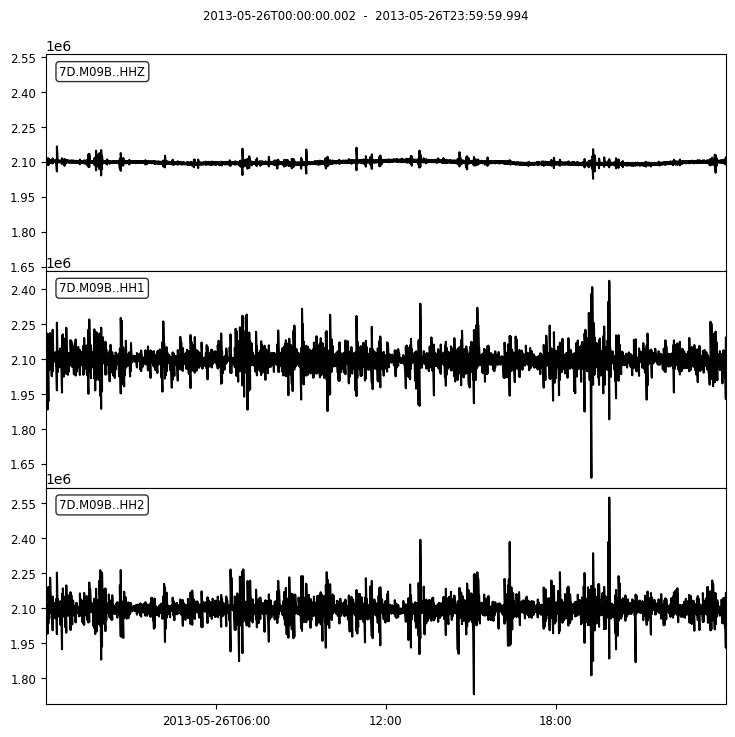

In [45]:
s.plot()

# Step 1: Load Seisbench phasepicker 

In [65]:
from seisbench.models import EQTransformer
model = EQTransformer.from_pretrained("original")
model

EQTransformer(
  (encoder): Encoder(
    (convs): ModuleList(
      (0): Conv1d(3, 8, kernel_size=(11,), stride=(1,), padding=(5,))
      (1): Conv1d(8, 16, kernel_size=(9,), stride=(1,), padding=(4,))
      (2): Conv1d(16, 16, kernel_size=(7,), stride=(1,), padding=(3,))
      (3): Conv1d(16, 32, kernel_size=(7,), stride=(1,), padding=(3,))
      (4): Conv1d(32, 32, kernel_size=(5,), stride=(1,), padding=(2,))
      (5): Conv1d(32, 64, kernel_size=(5,), stride=(1,), padding=(2,))
      (6): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    )
    (pools): ModuleList(
      (0-6): 7 x MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (res_cnn_stack): ResCNNStack(
    (members): ModuleList(
      (0-3): 4 x ResCNNBlock(
        (dropout): SpatialDropout1d(
          (dropout): Dropout2d(p=0.1, inplace=False)
        )
        (norm1): BatchNorm1d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv1d(

#  Step 2: data reading and filterting


In [47]:
s= client.get_waveforms(network="7D", station='M09B', channel="?H?",
                               year=2013, month=5, day=26)
s

3 Trace(s) in Stream:
7D.M09B..HH1 | 2013-05-26T00:00:00.002000Z - 2013-05-26T23:59:59.994000Z | 125.0 Hz, 10800000 samples
7D.M09B..HH2 | 2013-05-26T00:00:00.002000Z - 2013-05-26T23:59:59.994000Z | 125.0 Hz, 10800000 samples
7D.M09B..HHZ | 2013-05-26T00:00:00.002000Z - 2013-05-26T23:59:59.994000Z | 125.0 Hz, 10800000 samples

In [53]:
# This is to filter data 
s.filter('bandpass', freqmin=4, freqmax=15)

3 Trace(s) in Stream:
7D.M09B..HH1 | 2013-05-26T00:00:00.002000Z - 2013-05-26T23:59:59.994000Z | 125.0 Hz, 10800000 samples
7D.M09B..HH2 | 2013-05-26T00:00:00.002000Z - 2013-05-26T23:59:59.994000Z | 125.0 Hz, 10800000 samples
7D.M09B..HHZ | 2013-05-26T00:00:00.002000Z - 2013-05-26T23:59:59.994000Z | 125.0 Hz, 10800000 samples

# Step 3: Pick phase

In [59]:
# Use the GPU
model.to(device)

EQTransformer(
  (encoder): Encoder(
    (convs): ModuleList(
      (0): Conv1d(3, 8, kernel_size=(11,), stride=(1,), padding=(5,))
      (1): Conv1d(8, 16, kernel_size=(9,), stride=(1,), padding=(4,))
      (2): Conv1d(16, 16, kernel_size=(7,), stride=(1,), padding=(3,))
      (3): Conv1d(16, 32, kernel_size=(7,), stride=(1,), padding=(3,))
      (4): Conv1d(32, 32, kernel_size=(5,), stride=(1,), padding=(2,))
      (5): Conv1d(32, 64, kernel_size=(5,), stride=(1,), padding=(2,))
      (6): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    )
    (pools): ModuleList(
      (0-6): 7 x MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (res_cnn_stack): ResCNNStack(
    (members): ModuleList(
      (0-3): 4 x ResCNNBlock(
        (dropout): SpatialDropout1d(
          (dropout): Dropout2d(p=0.1, inplace=False)
        )
        (norm1): BatchNorm1d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv1d(

In [60]:
model.classify(s)

([<seisbench.util.annotations.Pick at 0x7f07b26a4f70>,
  <seisbench.util.annotations.Detection at 0x7f079f751be0>])

In [61]:
picks = model.classify(s)

# Plot the Picks

In [63]:
type(picks)

tuple

In [75]:
from EQTransformer.utils.plot import plot_data_chart


SyntaxError: invalid syntax (3411383673.py, line 1)